# Gaussian Mixture Model using Gradient Ascent

In [1]:
import numpy as np
from numpy import apply_along_axis as apply
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from scipy.stats import norm, multivariate_normal
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# hyperparameters
k = 3
it = 20
lr = 0.005

In [3]:
# generate a dataset
X, Y = make_blobs(n_samples=1000, centers=5,cluster_std=1.2,random_state=123,n_features=1)
X = X - np.min(X,axis=0)

# split for training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

# initialize cluster centers within these limits
#limits = np.quantile(X_train,[0.05,0.95],axis=0) # robust to outliers
limits = np.r_[np.min(X_train,axis=0).reshape((1,-1)),np.max(X_train,axis=0).reshape((1,-1))]

In [4]:
# initialize randomly
mu = [apply(lambda x: np.random.uniform(x[0],x[1]),0,limits) for _ in range(k)]
sigma = np.ones(k)*2

#plt.hist(X_train)
#plt.show()

# initialize mixture weights
mix = np.ones(k)/k
N = X_train.shape[0]

In [5]:
prob_list = []
for i in range(it):
    # probabilities for each distr.
    prob = [multivariate_normal(m,s).pdf(X_train) for m,s in zip(mu,sigma)]
    prob = np.asarray(prob).T
    
    # multiply with mixture weights
    prob = prob * mix
    
    # normalize each row
    prob = prob/np.sum(prob,axis=1).reshape((-1,1))
    
    ### Maximization step - multiply probabilities of each distr with data, and calc. mu and sigma
    m_c = np.sum(prob,axis=0)
    mix = m_c/X_train.shape[0] # new weights for each distr.
    
    # gradient ascent
    for j in range(k):
        m, s = mu[j], sigma[j]
        tmp = np.sqrt(2*np.pi)
        mu_deriv = (1/s**2)*np.sum(X_train - m) # derivative w.r.t. mu
        sigma_deriv = (N*s*2*tmp)/np.log(s**2*tmp) + (1/(3*(s**3))*np.sum((X_train - m)**2)) # derivative w.r.t. sigma
        
        # update parameters according to gradient direction
        mu[j] = m + (mu_deriv/N) * lr
        sigma[j] = s + (sigma_deriv/N) * lr

    prob_list.append(np.sum(np.log(prob)))
    print(prob_list[-1])

-21708.683089449423
-21542.19292292733
-21260.51076121801
-20960.590822777456
-20663.257004241674
-20374.272114703694
-20095.024787312675
-19825.513238912506
-19565.314151738556
-19313.901828512004
-19070.75109893229
-18835.368130514664
-18607.297381882403
-18386.120895564345
-18171.45536996922
-17962.94881579289
-17760.277368828152
-17563.14241393071
-17371.268036886966
-17184.398778607498


In [6]:
def log_prob(x,mix,mu,sigma):
    prob = [multivariate_normal(m,s).pdf(x) for m,s in zip(mu,sigma)]
    prob = np.asarray(prob).T
    prob = prob*mix
    return np.sum(prob,axis=1)

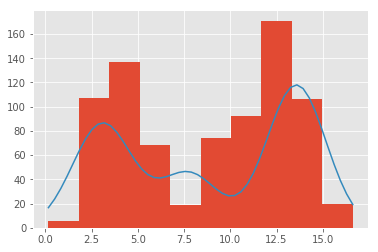

In [7]:
x = np.linspace(limits[0][0],limits[1][0])
x_probs = log_prob(x,mix,mu,sigma)

plt.hist(X_train)
plt.plot(x,x_probs*1000)
plt.show()